### Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mitosheet
sns.set()

In [65]:
# setting few options 
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

### Loading the data

In [66]:
sealevel_data = pd.read_csv('epa-sea-level.csv')
sealevel_data.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000,-0.953,0.953,NaN
1,1881,0.220,-0.732,1.173,NaN
2,1882,-0.441,-1.346,0.465,NaN
3,1883,-0.232,-1.130,0.665,NaN
4,1884,0.591,-0.283,1.465,NaN


In [67]:
# Good practice to work with a copy of the original data
sealevel = sealevel_data.copy()

In [68]:
# analyzing the dataframe
sealevel.isna().sum(), sealevel.shape

# there are null values in the NoAA column. 

(Year                          0
 CSIRO Adjusted Sea Level      0
 Lower Error Bound             0
 Upper Error Bound             0
 NOAA Adjusted Sea Level     113
 dtype: int64,
 (134, 5))

In [69]:
sealevel.loc[~sealevel['NOAA Adjusted Sea Level'].isna()].head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
113,1993,6.291,6.028,6.555,6.297
114,1994,6.500,6.236,6.764,6.311
115,1995,6.618,6.354,6.882,6.453
116,1996,6.787,6.524,7.051,6.628
117,1997,7.067,6.803,7.331,6.734


##### Q1. Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.

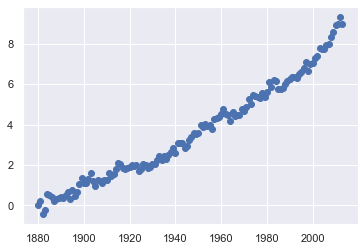

In [70]:
x = sealevel['Year']
y = sealevel['CSIRO Adjusted Sea Level']

plt.scatter(x, y)

#### Q2. Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

In [71]:
from scipy.stats import  linregress as lr
reg_1 = lr(x,y)


In [72]:
reg_1.intercept

-119.06594196773978

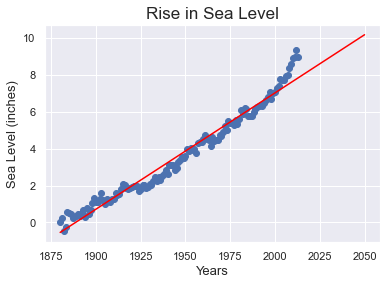

In [73]:
# I created a series for the years to include the year 2050
x_pred = pd.Series([i for i in range(1880, 2051)])

# the regression line will be given by
y_hat = reg_1.intercept + reg_1.slope*x_pred


plt.scatter(x,y)
plt.plot(x_pred,y_hat, color='red')

#plt.text(1920, 4, 'y=mx +c', fontsize= 10)

# The x label should be "Year", the y label should be "Sea Level (inches)", 
# and the title should be "Rise in Sea Level".
plt.xlabel('Years', fontsize=13)
plt.ylabel('Sea Level (inches)', fontsize=13)
plt.title('Rise in Sea Level', fontsize=17)


plt.show()

In [74]:
# Using the current regression line, the exact prediction of the sea level at year 2050 will be:
y_hat_2050 = reg_1.intercept + reg_1.slope * 2050
y_hat_2050

10.175455257136548

Text(0.5, 1.0, 'Rise in Sea Level')

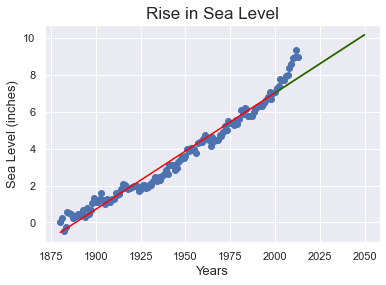

In [75]:
# to get line of best fit, we run the same code, but the years begin with year 2000
x_pred = pd.Series([i for i in range(1880, 2051)])

# the regression line will be given by
y_hat = reg_1.intercept + reg_1.slope * x_pred

# for line of best fit, starting with year 2000
df2 = sealevel.loc[sealevel['Year'] >= 2000]
x2 = sealevel['Year']
y2 = sealevel['CSIRO Adjusted Sea Level']

reg_2 = lr(x2, y2)

x_pred2 = pd.Series([i for i in range(2000, 2051)])
y_hat2 = reg_2.intercept + reg_2.slope * x_pred2


plt.scatter(x,y)
#plt.scatter(x2,y2)
plt.plot(x_pred,y_hat, color='red')
plt.plot(x_pred2, y_hat2, color= 'green')

#plt.text(1920, 4, 'y=mx +c', fontsize= 10)

# The x label should be "Year", the y label should be "Sea Level (inches)", 
# and the title should be "Rise in Sea Level".
plt.xlabel('Years', fontsize=13)
plt.ylabel('Sea Level (inches)', fontsize=13)
plt.title('Rise in Sea Level', fontsize=17)

In [76]:
y_hat_2050_2 = reg_2.intercept + reg_2.slope * 2050
y_hat_2050_2

10.175455257136548